In [9]:
from env import Environment
from agent import QLearningTable

In [10]:
env = Environment()
RL = QLearningTable(actions=list(range(env.n_actions)))

In [11]:
def update():
    # Daftar yang dihasilkan untuk merencanakan Episode melalui Langkah
    steps = []

    # Jumlahkan biaya untuk semua episode dalam daftar yang dihasilkan
    all_costs = []

    for episode in range(1000):
        # Initial Observation
        observation = env.reset()

        # Memperbarui jumlah Langkah untuk setiap Episode
        i = 0

        # Memperbarui biaya untuk setiap episode
        cost = 0

        while True:
            # Refreshing environment
            env.render()

            # RL memilih tindakan berdasarkan pengamatan
            action = RL.choose_action(str(observation))

            # RL mengambil tindakan dan mendapatkan pengamatan dan hadiah berikutnya
            observation_, reward, done = env.step(action)

            # RL belajar dari transisi ini dan menghitung biayanya
            cost += RL.learn(str(observation), action, reward, str(observation_))

            # Menukar pengamatan - saat ini dan selanjutnya
            observation = observation_

            # Menghitung jumlah Langkah dalam Episode saat ini
            i += 1

            # Break while loop saat ini adalah akhir dari Episode saat ini
            # Ketika agen mencapai tujuan atau rintangan
            if done:
                steps += [i]
                all_costs += [cost]
                break

    # Menampilkan rute terakhir
    env.final()

    # Menampilkan tabel-Q dengan nilai untuk setiap tindakan
    RL.print_q_table()

    # Merencanakan hasil
    RL.plot_results(steps, all_costs)

The shortest route: 40
The longest route: 1598
[23.0, 3.0, 37.0, 17.0]
[43.0, 3.0, 57.0, 17.0]
[63.0, 3.0, 77.0, 17.0]
[63.0, 23.0, 77.0, 37.0]
[83.0, 23.0, 97.0, 37.0]
[83.0, 43.0, 97.0, 57.0]
[83.0, 63.0, 97.0, 77.0]
[83.0, 83.0, 97.0, 97.0]
[103.0, 83.0, 117.0, 97.0]
[103.0, 103.0, 117.0, 117.0]
[123.0, 103.0, 137.0, 117.0]
[143.0, 103.0, 157.0, 117.0]
[143.0, 123.0, 157.0, 137.0]
[163.0, 123.0, 177.0, 137.0]
[163.0, 143.0, 177.0, 157.0]
[163.0, 163.0, 177.0, 177.0]
[183.0, 163.0, 197.0, 177.0]
[183.0, 183.0, 197.0, 197.0]
[203.0, 183.0, 217.0, 197.0]
[223.0, 183.0, 237.0, 197.0]
[243.0, 183.0, 257.0, 197.0]
[263.0, 183.0, 277.0, 197.0]
[283.0, 183.0, 297.0, 197.0]
[283.0, 203.0, 297.0, 217.0]
[303.0, 203.0, 317.0, 217.0]
[303.0, 223.0, 317.0, 237.0]
[323.0, 223.0, 337.0, 237.0]
[343.0, 223.0, 357.0, 237.0]
[363.0, 223.0, 377.0, 237.0]
[363.0, 243.0, 377.0, 257.0]
[363.0, 263.0, 377.0, 277.0]
[383.0, 263.0, 397.0, 277.0]
[403.0, 263.0, 417.0, 277.0]
[403.0, 283.0, 417.0, 297.0]
[403

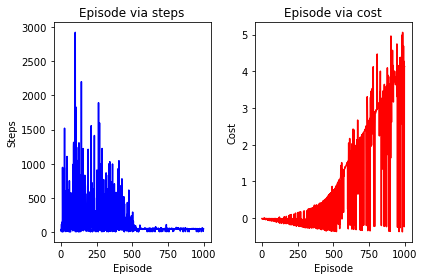

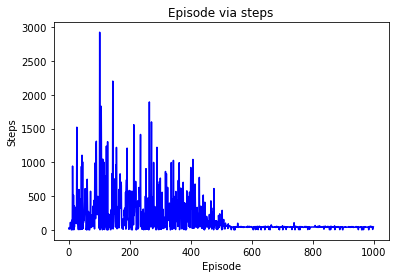

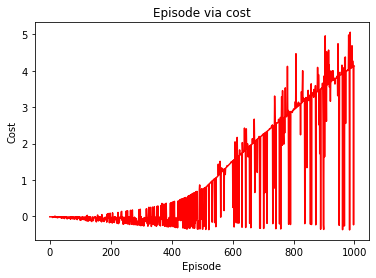

In [12]:
# Menjalankan loop utama dengan Episode dengan memanggil fungsi update()
env.after(100, update)
env.mainloop()